# Library: Pandas

# Installation
Pandas is an open-source library built on top of numpy providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. <br>
Pandas supports the integration with many file formats or data sources out of the box (csv, excel, sql, json, parquet,…).

In [1]:
#!conda install pandas
#!pip install pandas

import numpy as np
import pandas as pd

# Pandas Series
* One-dimensional ndarray with axis labels, meaning it can be indexed by a label, instead of just a number location.
* A pandas Series can hold a variety of object types.

## Creating Series
(data=None[, index=None, dtype=None, name=None, copy=False, fastpath=False])

In [2]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

In [3]:
#from python list to Series
ser = pd.Series(data=my_list)

ser = pd.Series(data=my_list,index=labels)
ser = pd.Series(my_list,labels)
ser

#from Series to python list
pd.Series.to_list(ser)

[10, 20, 30]

In [4]:
#from numpy array to Series
ser = pd.Series(arr)
ser = pd.Series(arr,labels)
ser

#from Series to numpy array
pd.Series(ser).array

<PandasArray>
[10, 20, 30]
Length: 3, dtype: int32

In [5]:
#from python dictionary to Series
ser = pd.Series(d)
ser

#from Series to dictionary
pd.Series.to_dict(ser)

{'a': 10, 'b': 20, 'c': 30}

In [6]:
ser = pd.Series([10,20,30],['a','b','c'])
ser

a    10
b    20
c    30
dtype: int64

## Indexing and selection
Pandas makes use of these index names or numbers by allowing for fast look ups of information.

In [7]:
ser1 = pd.Series([1,2,3,4],index = ['Enero', 'Febrero','Marzo', 'Abril'])                                   
ser1

ser2 = pd.Series([1,2,5,4],index = ['Enero', 'Febrero','Junio', 'Abril'])
ser2

ser1['Febrero']
ser1.loc['Febrero'] #equivalent, based on label
ser1.iloc[1] #equivalent, based on position

2

## Operations
Based on their associated values.

In [8]:
ser1 + ser2 #NaN when no matching

Abril      8.0
Enero      2.0
Febrero    4.0
Junio      NaN
Marzo      NaN
dtype: float64

In [9]:
ser1 - ser2 #NaN when no matching

Abril      0.0
Enero      0.0
Febrero    0.0
Junio      NaN
Marzo      NaN
dtype: float64

In [10]:
ser1 / ser2 #NaN when no matching

Abril      1.0
Enero      1.0
Febrero    1.0
Junio      NaN
Marzo      NaN
dtype: float64

In [11]:
ser1 * ser2 #NaN when no matching

Abril      16.0
Enero       1.0
Febrero     4.0
Junio       NaN
Marzo       NaN
dtype: float64

# Pandas Data Frames

Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. 


## Data Input and Output

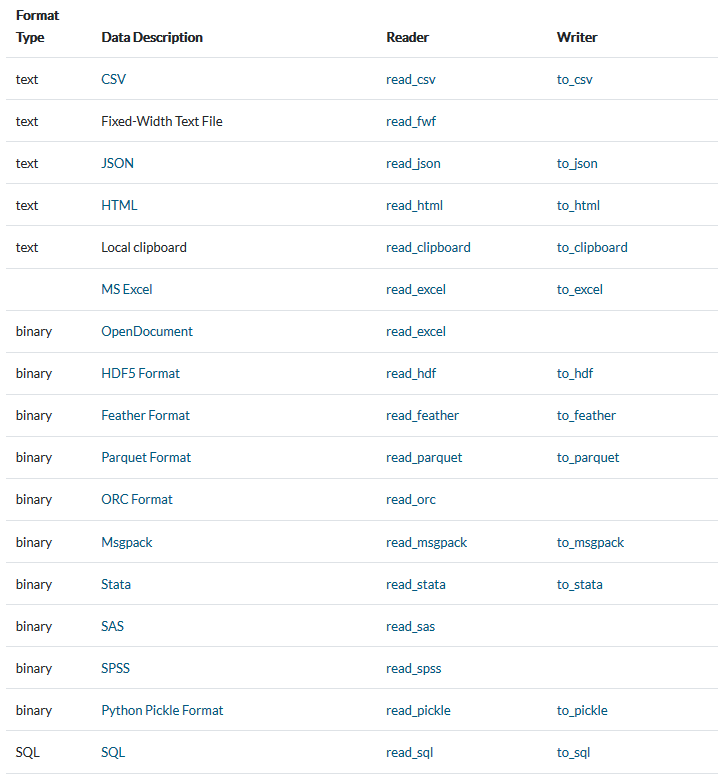

#### Examples

#### CSV

##### import
df = pd.read_csv("folder/file.csv")

##### export
df.to_csv('example',index=False)

#### EXCEL

##### import
df = pd.read_excel('file.xlsx', sheet_name='sample')

##### export
df.to_excel('df.xlsx', sheet_name='sample', index=False)

## Creating Data Frames

In [12]:
#passing a dictionaty with columns of different types
df = pd.DataFrame({'A': (1,2,3,4,5,6),
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(6)), dtype='float32'),
                    'D': np.array([3] * 6, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train", "test", "train"]), 
                    'F': 'foo'})
df

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,2,2013-01-02,1.0,3,train,foo
2,3,2013-01-02,1.0,3,test,foo
3,4,2013-01-02,1.0,3,train,foo
4,5,2013-01-02,1.0,3,test,foo
5,6,2013-01-02,1.0,3,train,foo


## Exploring the DataFrame

In [13]:
df.head(3) #first rows

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,2,2013-01-02,1.0,3,train,foo
2,3,2013-01-02,1.0,3,test,foo


In [14]:
df.tail(3) #last rows

,A,B,C,D,E,F
3,4,2013-01-02,1.0,3,train,foo
4,5,2013-01-02,1.0,3,test,foo
5,6,2013-01-02,1.0,3,train,foo


In [15]:
df.info() #number of rows, columns, and types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       6 non-null      int64         
 1   B       6 non-null      datetime64[ns]
 2   C       6 non-null      float32       
 3   D       6 non-null      int32         
 4   E       6 non-null      category      
 5   F       6 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), int32(1), int64(1), object(1)
memory usage: 342.0+ bytes


In [16]:
df.describe() #basic description of quantitative data

,A,C,D
count,6.000000,6.0,6.0
mean,3.500000,1.0,3.0
std,1.870829,0.0,0.0
min,1.000000,1.0,3.0
25%,2.250000,1.0,3.0
50%,3.500000,1.0,3.0
75%,4.750000,1.0,3.0
max,6.000000,1.0,3.0


In [17]:
df.dtypes #data type of columns

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [18]:
df.columns #column index names

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [19]:
del df['F'] #deletes column
df

,A,B,C,D,E
0,1,2013-01-02,1.0,3,test
1,2,2013-01-02,1.0,3,train
2,3,2013-01-02,1.0,3,test
3,4,2013-01-02,1.0,3,train
4,5,2013-01-02,1.0,3,test
5,6,2013-01-02,1.0,3,train


In [20]:
df.sort_values(by='A', ascending=False) ##sorting dataframe, inplace=False by default

,A,B,C,D,E
5,6,2013-01-02,1.0,3,train
4,5,2013-01-02,1.0,3,test
3,4,2013-01-02,1.0,3,train
2,3,2013-01-02,1.0,3,test
1,2,2013-01-02,1.0,3,train
0,1,2013-01-02,1.0,3,test


## Selection and Indexing

In [21]:
from numpy.random import randn
np.random.seed(123)

df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


In [22]:
#by row name
df.loc[['B']] #based on label, supports more than one

,W,X,Y,Z
B,-0.5786,1.651437,-2.426679,-0.428913


In [23]:
#by row position
df.iloc[[1,2]] #based on position, supports more than one

,W,X,Y,Z
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709


In [24]:
#by column name
df[['W']]

,W
A,-1.085631
B,-0.578600
C,1.265936
D,1.491390
E,2.205930


In [25]:
#list of column names
df[['W','Z']]

,W,Z
A,-1.085631,-1.506295
B,-0.578600,-0.428913
C,1.265936,-0.094709
D,1.491390,-0.434351
E,2.205930,0.386186


In [26]:
#by cell, [row,column]
df.loc['B','Y']

-2.426679243393074

In [27]:
#by group of cell, [rows,columns]
df.loc[['A','B'],['W','Y']]

,W,Y
A,-1.085631,0.282978
B,-0.578600,-2.426679


### Conditional selection

In [28]:
#one condition
df[df>0] #NaN = false

,W,X,Y,Z
A,NaN,0.997345,0.282978,NaN
B,NaN,1.651437,NaN,NaN
C,1.265936,NaN,NaN,NaN
D,1.491390,NaN,NaN,NaN
E,2.205930,2.186786,1.004054,0.386186


In [29]:
#condition in a column
df[df['W']>0]

,W,X,Y,Z
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


In [30]:
#condition in a column, select other columns
df[df['W']>0][['Y','X']]

,Y,X
C,-0.678886,-0.866740
D,-0.443982,-0.638902
E,1.004054,2.186786


In [31]:
#two conditions in different columns
df[(df['W']>0) & (df['Y'] > 1)] #being & = AND

,W,X,Y,Z
E,2.20593,2.186786,1.004054,0.386186


In [32]:
#one condition or the other in different columns
df[(df['W']>0) | (df['Y'] > 1)] #being | = OR

,W,X,Y,Z
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


### Modify index

In [33]:
# Reset to default 0,1...n index
df.reset_index()
df

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


In [34]:
#new index
nind = 'blue green purple red yellow'.split()
df['Colours'] = nind
df.set_index('Colours')
#df.set_index('Colours',inplace=True) #to make it permanent
df

,W,X,Y,Z,Colours
A,-1.085631,0.997345,0.282978,-1.506295,blue
B,-0.578600,1.651437,-2.426679,-0.428913,green
C,1.265936,-0.866740,-0.678886,-0.094709,purple
D,1.491390,-0.638902,-0.443982,-0.434351,red
E,2.205930,2.186786,1.004054,0.386186,yellow


## Creating new column

In [35]:
df['newColumn'] = df['W'] + df['Y']
df

,W,X,Y,Z,Colours,newColumn
A,-1.085631,0.997345,0.282978,-1.506295,blue,-0.802652
B,-0.578600,1.651437,-2.426679,-0.428913,green,-3.005279
C,1.265936,-0.866740,-0.678886,-0.094709,purple,0.587050
D,1.491390,-0.638902,-0.443982,-0.434351,red,1.047408
E,2.205930,2.186786,1.004054,0.386186,yellow,3.209984


## Droping column

In [36]:
df.drop('newColumn',axis=1, inplace=True) #inplace=True makes it permanent
df.drop('Colours',axis=1, inplace=True) #inplace=True makes it permanent
df

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


In [37]:
df.drop('E',axis=0) #inplace=True makes it permanent
df

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


## Null values

In [38]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [39]:
df.isnull() #finding nulls
df.isna() #finding na

,A,B,C
0,False,False,False
1,False,True,False
2,True,True,False


In [40]:
df.dropna() #drops very row with NaN

,A,B,C
0,1.0,5.0,1


In [41]:
df.dropna(axis=1) #drops every column with NaN

,C
0,1
1,2
2,3


In [42]:
df.dropna(thresh=2) #drops every row with specific number of NaN

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [43]:
df.fillna(value='FILL VALUE') #replaces NaN with a defined value

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [44]:
df['A'].fillna(value=df['A'].mean()) #replaces NaN with the mean of the column

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

### Multi-Index Hierarchy

In [45]:
#Creates a data frame with multi-index
outside = ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'] #index generated
inside = ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'] #index generated

hier_index = list(zip(outside, inside)) #indexs are zip together
hier_index = pd.MultiIndex.from_tuples(hier_index, names=['first', 'second']) #hierarchy of index applied

df = pd.DataFrame(np.random.randn(8,3), index=hier_index, columns= ['A', 'B', 'C']) #random data generated
df

A         B         C
first second                              
bar   one     0.737369  1.490732 -0.935834
      two     1.175829 -1.253881 -0.637752
baz   one     0.907105 -1.428681 -0.140069
      two    -0.861755 -0.255619 -2.798589
foo   one    -1.771533 -0.699877  0.927462
      two    -0.173636  0.002846  0.688223
qux   one    -0.879536  0.283627 -0.805367
      two    -1.727669 -0.390900  0.573806

In [46]:
#change index names
df.index.names
df.index.names = ['first','second']
df

A         B         C
first second                              
bar   one     0.737369  1.490732 -0.935834
      two     1.175829 -1.253881 -0.637752
baz   one     0.907105 -1.428681 -0.140069
      two    -0.861755 -0.255619 -2.798589
foo   one    -1.771533 -0.699877  0.927462
      two    -0.173636  0.002846  0.688223
qux   one    -0.879536  0.283627 -0.805367
      two    -1.727669 -0.390900  0.573806

In [47]:
df.loc['foo'] #outer index selected
df.xs('foo') #equivalent

,A,B,C
second,,,
one,-1.771533,-0.699877,0.927462
two,-0.173636,0.002846,0.688223


In [48]:
df.loc['foo'].loc['one'] #outer and inner index selected by name
df.xs(['foo','one']) #equivalent

A   -1.771533
B   -0.699877
C    0.927462
Name: (foo, one), dtype: float64

In [49]:
df.xs('two',level='second') #cross-section function allows indexing directly inner index

,A,B,C
first,,,
bar,1.175829,-1.253881,-0.637752
baz,-0.861755,-0.255619,-2.798589
foo,-0.173636,0.002846,0.688223
qux,-1.727669,-0.390900,0.573806


## Groupby

The groupby method allows to group rows of data together and call aggregate functions.

In [50]:
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [51]:
df.groupby("Company") #group using criteria
df.groupby("Company").mean() #select way of aggregation(ex. mean)

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [52]:
df.groupby("Company").sum() #sum of the group

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [53]:
df.groupby("Company").max() #maximum of the group

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [54]:
df.groupby("Company").std() #standard deviation of the group

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [55]:
df.groupby("Company").count() #count cases of the group

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [56]:
df.groupby("Company").describe().transpose() #describe + transpose

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

## Merging, Joining, and Concatenating

In [57]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [58]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### Concatenate

Dimensions should match along the axis you are concatenating on, gets all the rows together.

In [59]:
pd.concat([df1,df2], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [60]:
result = df1.append(df2) #equivalent
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### Merge

Allows you to merge DataFrames together using a similar logic as merging SQL Tables together.

In [61]:
#creates left table
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
left

#creates right table
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})
right

#performs INNER merge (only coincidences in key between dataframes are kept)
pd.merge(left, right, how='inner', on='key', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [62]:
#creates left table
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

#creates left table
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

#performs inner merge (only coincidences between dataframes in both keys are kept)
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [63]:
#performs OUTER merge (all cases are kept)
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [64]:
#performs RIGHT merge (all cases of right dataframe are kept)
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [65]:
#performs LEFT merge (all cases of left dataframe are kept)
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


### Join
Combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [66]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])
left.join(right) #inner join

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [67]:
left.join(right, how='outer') #outer join

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## Operations

In [68]:
#creates data frame
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [69]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]
newdf

,col1,col2,col3
3,4,444,xyz


In [70]:
#list of unique values
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [71]:
#number of unique values
df['col2'].nunique() 

3

In [72]:
#amount of each value
df['col2'].value_counts() 

444    2
555    1
666    1
Name: col2, dtype: int64

In [73]:
#Applying created functions
def times2(x):
    return x*2

df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [74]:
#Applying standard functions
df['col3'].apply(len) #lenght of the values
df['col1'].sum() #sum of the values

10

## Pivot table

![pivot](https://pandas.pydata.org/docs/_images/reshaping_pivot.png)

In [75]:
#creates data frame from dictionary
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}
df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [76]:
#creates pivot table
df.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

## Reshaping by stacking
![stack](https://pandas.pydata.org/docs/_images/reshaping_stack.png)

In [77]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [78]:
df2 = df[:4]
df2

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5


In [79]:
#Stacking
stacked = df2.stack()
dfstacked = pd.DataFrame(stacked, columns =['cases'])
dfstacked

cases
0 A   foo
  B   one
  C     x
  D     1
1 A   foo
  B   one
  C     y
  D     3
2 A   foo
  B   two
  C     x
  D     2
3 A   bar
  B   two
  C     y
  D     5

In [80]:
#Unstacking
dfstacked.unstack()

cases           
      A    B  C  D
0   foo  one  x  1
1   foo  one  y  3
2   foo  two  x  2
3   bar  two  y  5

## Reshaping by Melt
![Melt](https://pandas.pydata.org/docs/_images/reshaping_melt.png)

In [81]:
cheese = pd.DataFrame({'first': ['John', 'Mary'],
                       'last': ['Doe', 'Bo'],
                       'height': [5.5, 6.0],
                       'weight': [130, 150]})
cheese

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [82]:
cheese.melt(id_vars=['first', 'last'], var_name='quantity')

,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


## Data visualization

In [83]:
import matplotlib as plt
import seaborn as sns

# loading databases
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [84]:
%matplotlib inline

### Styles

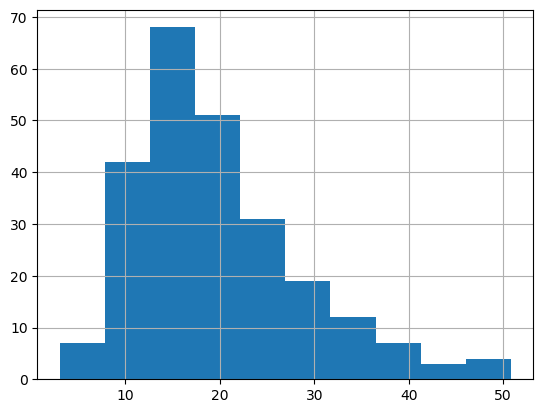

In [85]:
#set matplotlib style
plt.style.use('default')
tips['total_bill'].hist()

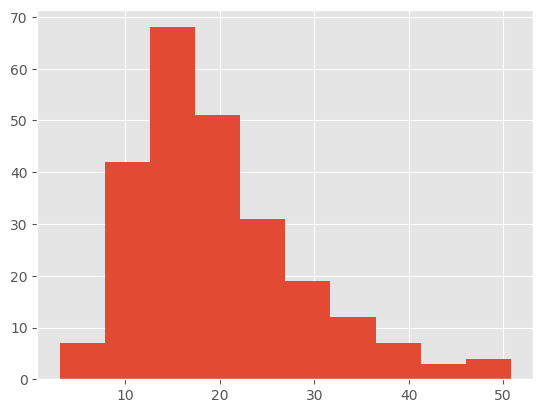

In [86]:
plt.style.use('ggplot')
tips['total_bill'].hist()

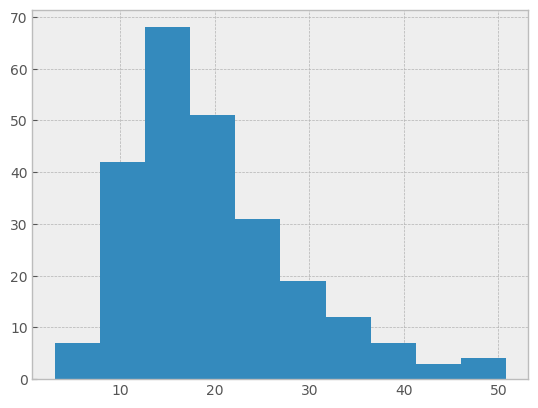

In [87]:
plt.style.use('bmh')
tips['total_bill'].hist()

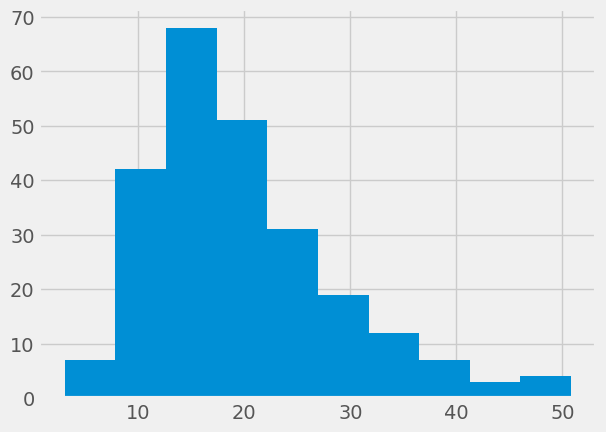

In [88]:
plt.style.use('fivethirtyeight')
tips['total_bill'].hist()

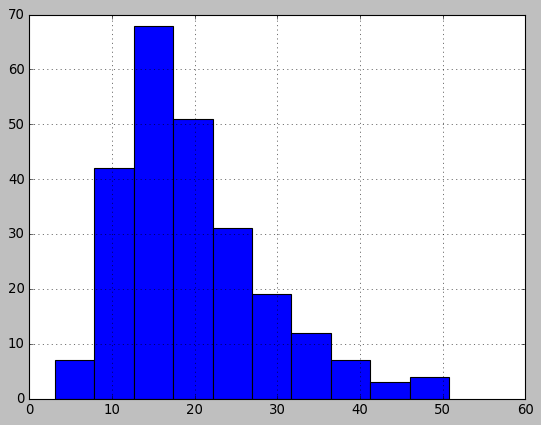

In [89]:
plt.style.use('classic')
tips['total_bill'].hist()

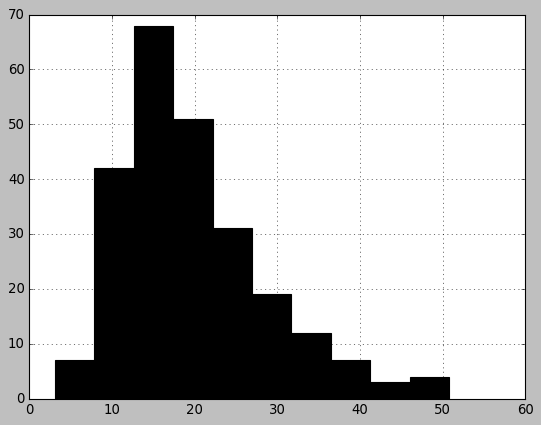

In [90]:
plt.style.use('grayscale')
tips['total_bill'].hist()

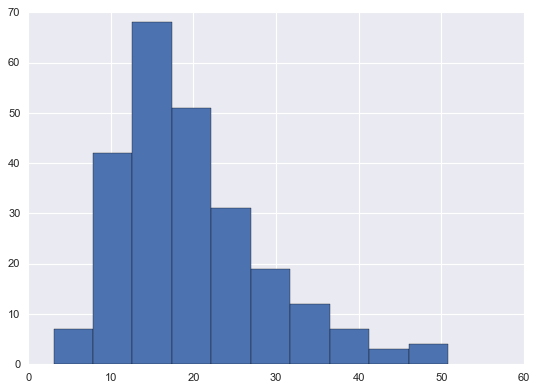

In [91]:
plt.style.use('seaborn')
tips['total_bill'].hist()

### Graphic types

In [92]:
df1 = tips[0:20][['total_bill', 'tip']]
df1.head()

df2 = tips[['total_bill', 'tip', 'day']]
df2.head()

df3 = tips[0:20][['total_bill', 'tip', 'size']]
df3.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


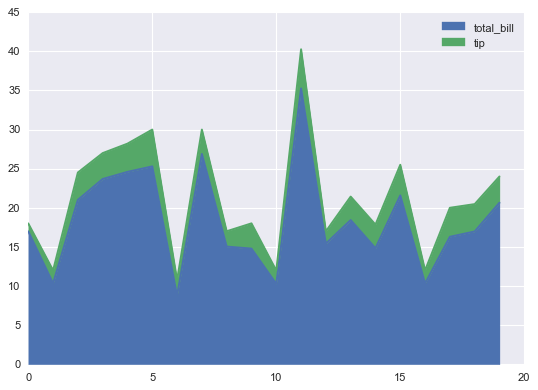

In [93]:
df1.plot.area() #can only use quantitative information, qualitative make error

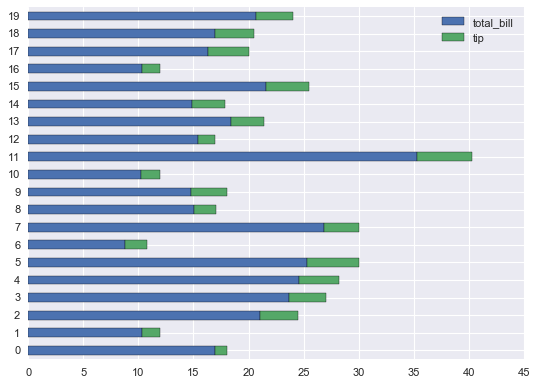

In [94]:
df1.plot.barh(stacked=True) #can only work with quantitative data, skips qualitative

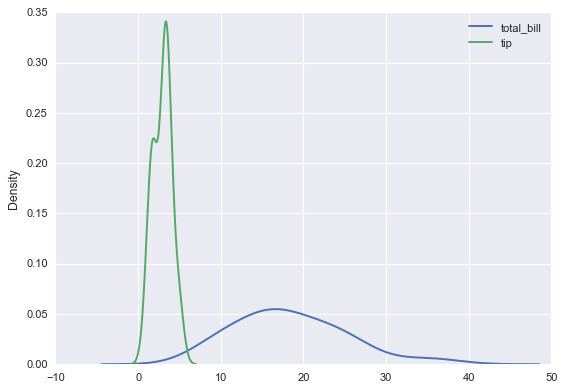

In [95]:
df1.plot.density() #distribution of quantitative data, skips qualitative

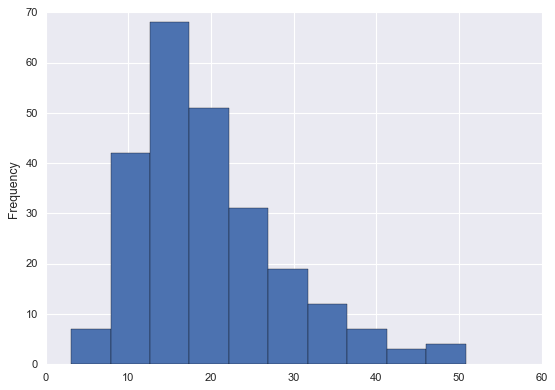

In [96]:
df2['total_bill'].plot.hist(bins = 10) #distribution of quantitative data, skips qualitative

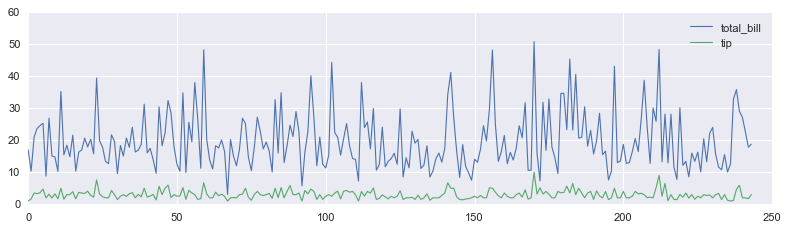

In [97]:
df2.plot.line(figsize=(12,3),lw=1) #works with quantitative data, skips qualitative

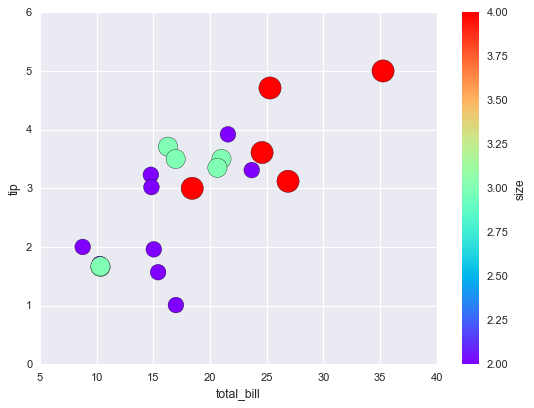

In [98]:
df3.plot.scatter(x = 'total_bill', y = 'tip', c = 'size', s=df3['size']*100, cmap = 'rainbow') #can only use quantitative information, qualitative make error

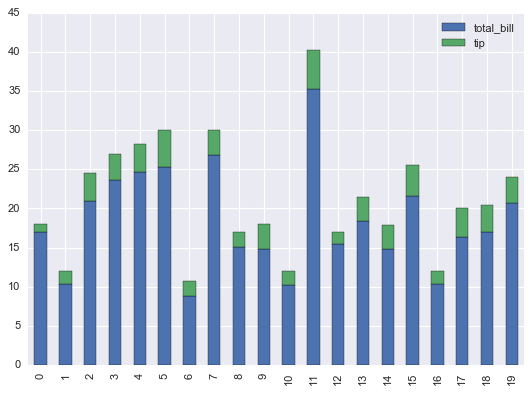

In [99]:
df1.plot.bar(stacked = True) #can only work with quantitative data, skips qualitative

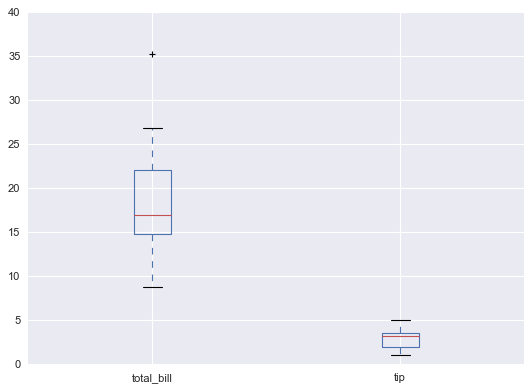

In [100]:
df1.plot.box() #categories are the columns, can be used "by = " for groupby

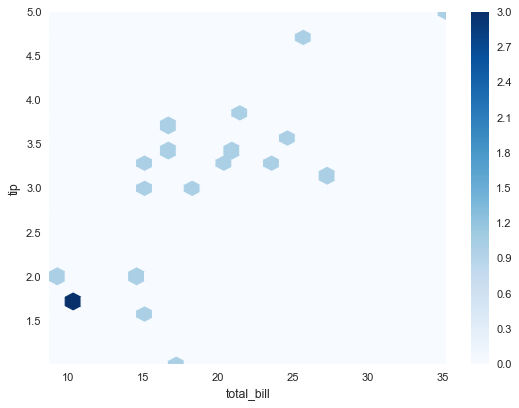

In [101]:
df1.plot.hexbin('total_bill', 'tip',gridsize=25,cmap='Blues') #distribution of quantitative data, skips qualitative

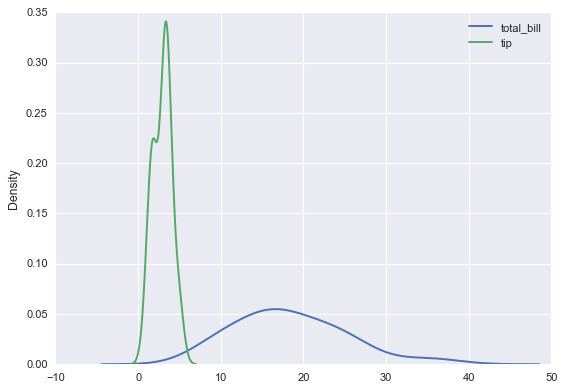

In [102]:
df1.plot.kde()